In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import os
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import rcParams
from sklearn.linear_model import LogisticRegression
import scipy.stats as spst
import sys
import re

from routines import *
from matching import *

def clear_name(x): 
    return x.replace("_dark","").replace("_light","").replace("_numbered","_light_numbered")

In [23]:
folder = "pairs_results"
est = pd.read_csv(folder+os.sep+'est.csv', index_col=0)
workers = pd.read_csv(folder+os.sep+'workers.csv', index_col=0)
images = pd.read_csv(folder+os.sep+'images.csv', index_col=0)
imgpairs = pd.read_csv(folder+os.sep+'matched_pairs.csv', index_col=0)

In [25]:
import importlib
import process_pairs as pp
importlib.reload(pp)

est = pp.assign_color_groups(est, images)   
imgpairs, g, gdv = pp.compute_stats(est, imgpairs)
#print(imgpairs)

set()
group
dd    2425
dl    2337
ld    2346
ll    2422
dtype: int64
Count of images per group: group
dd    56
dl    56
ld    56
ll    56
dtype: int64
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
dd: 0.548 (0.514, 0.563)
dl: 0.566 (0.532, 0.581)
ld: 0.511 (0.472, 0.526)
ll: 0.525 (0.495, 0.541)


SystemExit: 1

In [4]:
print("            (2)                 (2)         ")
print("     #######################################")
print("(1) # %s: %.3lf (%.3lf, %.3lf) # %s: %.3lf (%.3lf, %.3lf)" %\
      (g[0], gdv[g[0]].value, gdv[g[0]].lower_bound, gdv[g[0]].upper_bound,\
       g[1], gdv[g[1]].value, gdv[g[1]].lower_bound, gdv[g[1]].upper_bound))

print("(1) # %s: %.3lf (%.3lf, %.3lf) # %s: %.3lf (%.3lf, %.3lf)" %\
      (g[2], gdv[g[2]].value, gdv[g[2]].lower_bound, gdv[g[2]].upper_bound,\
       g[3], gdv[g[3]].value, gdv[g[3]].lower_bound, gdv[g[3]].upper_bound))

0.5361095045305572 0.4707193615047235 0.6026288301884519
            (2)                 (2)         
     #######################################
(1) # ll: 0.513 (0.452, 0.574) # ls: 0.536 (0.471, 0.603)
(1) # sl: 0.537 (0.473, 0.602) # ss: 0.549 (0.477, 0.621)


In [5]:
# look at all changes that happen when someone changes their shirt from l to d
# iterate in 4x steps to consider each pair once
def compute_clothes_effect(imgpairs, images):
    idx_ll = range(0, imgpairs.shape[0], 4)
    idx_ld = range(1, imgpairs.shape[0], 4)
    idx_dl = range(2, imgpairs.shape[0], 4)
    idx_dd = range(3, imgpairs.shape[0], 4)

    # check
    print(np.unique(imgpairs.iloc[idx_ll].group.values), np.unique(imgpairs.iloc[idx_ld].group.values))
    print(np.unique(imgpairs.iloc[idx_dl].group.values), np.unique(imgpairs.iloc[idx_dd].group.values))

    
    # pairwise view 
    # 1st member changes: LL->DL and LD->DD
    vd1l = imgpairs.iloc[idx_dl].votes1.values - imgpairs.iloc[idx_ll].votes1.values
    vd1d = imgpairs.iloc[idx_dd].votes1.values - imgpairs.iloc[idx_ld].votes1.values
    vd1 = np.append(vd1l, vd1d)


    # 2nd member changes: LL->LD and DL->DD
    vd2l = imgpairs.iloc[idx_ld].votes2.values - imgpairs.iloc[idx_ll].votes2.values
    vd2d = imgpairs.iloc[idx_dd].votes2.values - imgpairs.iloc[idx_dl].votes2.values
    vd2 = np.append(vd2l, vd2d)

    vd = np.append(vd1,vd2)
    
    # person-wise view
    images["delta"], images["cnt_pairs"] = 0, 0
    print(images.shape)
    for i in range(0, imgpairs.shape[0], 4):
        images.loc[clear_name(imgpairs.img1.values[i]),"delta"] +=\
            imgpairs.iloc[i+2].votes1 - imgpairs.iloc[i].votes1 +\
            imgpairs.iloc[i+3].votes1 - imgpairs.iloc[i+1].votes1
        images.loc[clear_name(imgpairs.img1.values[i]),"cnt_pairs"] += 1
        
        images.loc[clear_name(imgpairs.img2.values[i]),"delta"] +=\
            imgpairs.iloc[i+1].votes2 - imgpairs.iloc[i].votes2 +\
            imgpairs.iloc[i+3].votes2 - imgpairs.iloc[i+2].votes2
        images.loc[clear_name(imgpairs.img2.values[i]),"cnt_pairs"] += 1
        
    return vd, images
    
vd, images = compute_clothes_effect(imgpairs, images)
vd *= 100

['ll'] ['ls']
['sl'] ['ss']
(300, 7)


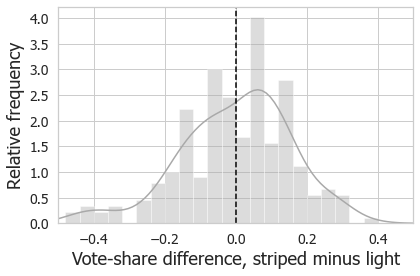

Average vote improvement: 0.0436789088104877
with CI: 0.0436789088104877    (-1.9650975395218808, 2.0670923101021788)
Wilcoxon's test: WilcoxonResult(statistic=11309.0, pvalue=0.5761487308355322)


In [6]:
import bootstrapped.bootstrap as bs
import bootstrapped.stats_functions as bs_stats

# pairwise view
sns.set(style="whitegrid", palette="bright", color_codes=True)
rcParams['pdf.fonttype'] = 42
rcParams['ps.fonttype'] = 42
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Tahoma']
rcParams['figure.autolayout'] = True
constant_bins = np.arange(-0.8, 0.8, 0.04)
sns.distplot(vd/100, color='darkgrey', bins=constant_bins)
plt.axvline(x=0., linestyle='--', color='black')
plt.ylabel('Relative frequency', fontsize=18)
plt.xlabel('Vote-share difference, striped minus light', fontsize=18)
plt.xlim(-0.5, 0.5)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.savefig('Plots/plot_'+folder+'1_on_1.pdf')
plt.show()
# p-values and CI
print("Average vote improvement:", np.mean(vd))
print("with CI:", bs.bootstrap(vd, stat_func=bs_stats.mean, alpha=0.05, num_iterations=10000))
print("Wilcoxon's test:", spst.wilcoxon(vd))

(60, 7)


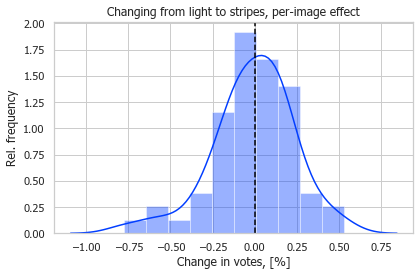

Average vote improvement: 0.0436789088104877
Median vote improvement: 2.500000000000002
with CI: 0.0436789088104877    (-2.003810796522556, 2.0997095352564106)
Wilcoxon's test: WilcoxonResult(statistic=11309.0, pvalue=0.5761487308355322)


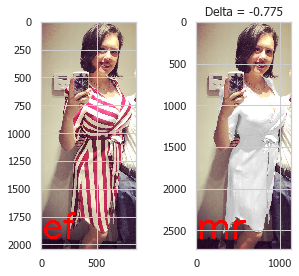

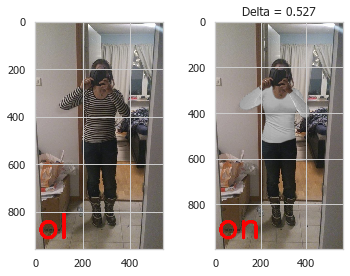

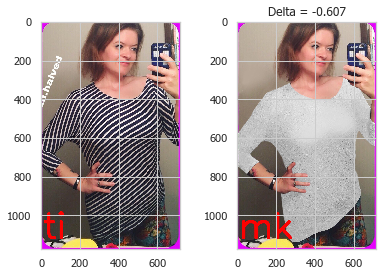

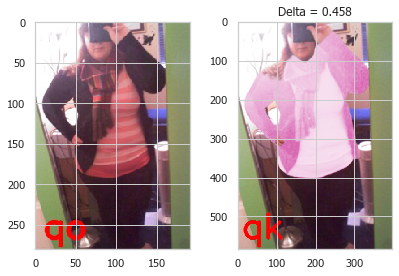

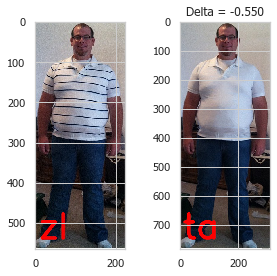

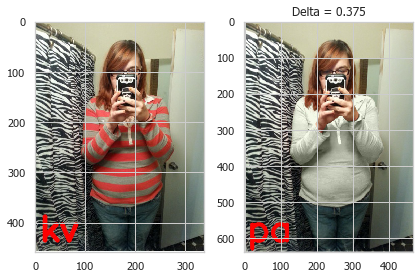

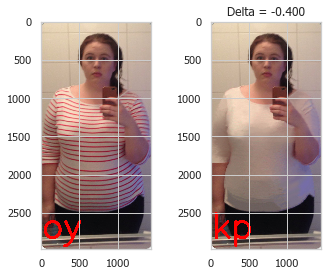

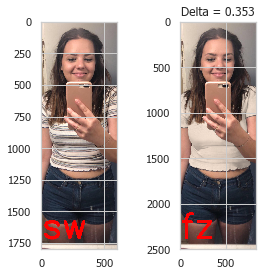

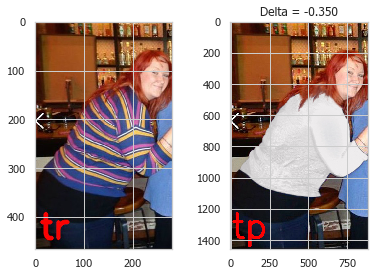

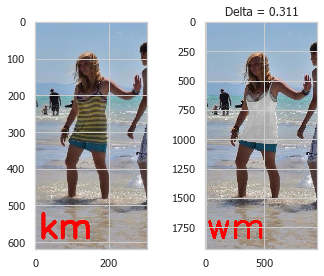

In [7]:
images = images.loc[images.cnt_pairs > 0]
images["delta"] = images["delta"] / images["cnt_pairs"]
print(images.shape)
plt.clf()
sns.distplot(images.delta)
plt.axvline(x=0., linestyle='--', color='black')
plt.title('Changing from light to stripes, per-image effect')
plt.ylabel('Rel. frequency')
plt.xlabel('Change in votes, [%]')
plt.savefig('Plots/plot_'+folder+'1_on_1_images.pdf')
plt.show()
# p-values and CI
print("Average vote improvement:", np.mean(vd))
print("Median vote improvement:", np.median(vd))
print("with CI:", bs.bootstrap(vd, stat_func=bs_stats.mean, alpha=0.05, num_iterations=10000))
print("Wilcoxon's test:", spst.wilcoxon(vd))

images = images.sort_values(by='delta')
for i in range(5):#(images.shape[0]-10,images.shape[0]):
    img1 = images.index.values[i].replace("_light_numbered","_numbered")
    img2 = images.index.values[i].replace("_light_numbered","_light_numbered")
    plt.clf()
    plt.subplot(1,2,1)
    plt.imshow(mpimg.imread('_photoshop_/images_numbered/'+img1))
    plt.subplot(1,2,2)
    plt.imshow(mpimg.imread('_photoshop_/images_numbered/'+img2))
    plt.title('Delta = %.3lf' % images.delta.values[i])
    plt.savefig('Plots/plot_'+folder+'1_on_1_neg_'+str(i)+'.pdf')
    plt.show()
    
    img1 = images.index.values[-(i+1)].replace("_light_numbered","_numbered")
    img2 = images.index.values[-(i+1)].replace("_light_numbered","_light_numbered")
    plt.clf()
    plt.subplot(1,2,1)
    plt.imshow(mpimg.imread('_photoshop_/images_numbered/'+img1))
    plt.subplot(1,2,2)
    plt.imshow(mpimg.imread('_photoshop_/images_numbered/'+img2))
    plt.title('Delta = %.3lf' % images.delta.values[-(i+1)])
    plt.savefig('Plots/plot_'+folder+'1_on_1_pos_'+str(i)+'.pdf')
    
    plt.show()
    

In [8]:
# check consistency (e.g. how the same workers label the same pairs)
wvp = est.groupby(["pairname","workerId"]).apply(lambda x: (',').join(x.num.values))
idx = [(len(x) == 5) for x in wvp.values]
wvp = wvp[idx].values
cwvp = [x[:2] == x[3:] for x in wvp]
print("Consistency:", np.sum(cwvp)/len(cwvp))

Consistency: 0.8614609571788413


In [9]:
print("Correct votes:", np.sum(est.correct)/est.shape[0])

Correct votes: 0.5058455114822547


imgpairs["num1"] = images.loc[imgpairs.img1.values,"num"].values
cv1 = est.groupby('workerId').apply(lambda x: x.loc[x.num.isin(imgpairs.num1.values)].shape[0]/x.shape[0])
workers["votes1"] = 0
workers.loc[cv1.index.values,"votes1"] = cv1.values
print(workers.loc[workers.votes1 >= 0.95].shape[0])
print(workers.loc[workers.votes1 >= 0.9].shape[0])
print(workers.loc[workers.votes1 <= 0.1].shape[0])
print(workers.shape)